<a href="https://colab.research.google.com/github/8ruaaki/azure-openai-test/blob/main/B5_TextAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. テキストの収集

- 青空文庫からテキストを収集します。
- まず，補足資料の「文書の収集」の箇所を読み、作業を行って下さい。
- その後，説明を読みながら各セルを実行して下さい。

### 1-1. 【授業中は実行しません】 スクレイピングによるテキストの収集

**すごく時間がかかるので授業中はここを実行せずに収集済みのテキストデータを利用します！！！**

ここでは「青空文庫」からデータを取得します。以下のように実行すると指定された著者の指定された著作のデータを取得します。

```
text = get_authors_work("著者名", "作品名")
```

著者名と作品名は**青空文庫の索引にある通り**に指定する必要があります。例えば，著者名の姓と名の間には半角スペースを入れます。

In [ ]:
# 必要なパッケージの読み込み
import os
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
# スクレイピングを行う関数の定義

def get_author_page_url(author):
    base_url = "https://www.aozora.gr.jp/index_pages/"
    res = requests.get(base_url + "person_all.html")
    soup = BeautifulSoup(res.text.encode(res.encoding), "html.parser")
    author_link = soup.find("a", text=author)
    href = None
    if author_link is not None:
        href = base_url + author_link.get("href").split("#")[0]
    return href


def get_author_works_urls(author):
    base_url = "https://www.aozora.gr.jp/"
    url_regex = re.compile(r"cards\/.+\.html$")

    author_url = get_author_page_url(author)
    works_urls = {}
    if author_url is not None:
        res = requests.get(author_url)
        soup = BeautifulSoup(res.text.encode(res.encoding), "html.parser")
        works_links = soup.find_all("a", {"href": url_regex})
        if works_links is not None:
            for w in works_links:
                w_title = w.text
                w_url = base_url + url_regex.search(w.get("href")).group()
                works_urls[w_title] = w_url
    return works_urls


def get_author_work_page_url(author, work):
    works_urls = get_author_works_urls(author)
    url = None
    if work in works_urls.keys():
        url = works_urls[work]
    return url


def get_author_work_url(author, work):
    work_page_url = get_author_work_page_url(author, work)
    url = None
    if work_page_url is not None:
        res = requests.get(work_page_url)
        soup = BeautifulSoup(res.text.encode(res.encoding), "html.parser")
        dl_tag = soup.find("table", class_="download")
        if dl_tag is not None:
            xhtml_tag = dl_tag.find("a", {"href": re.compile(r"\.html$")})
            if xhtml_tag is not None:
                url = xhtml_tag.get("href")
    if url is not None:
        url = os.path.dirname(work_page_url) + "/files/" + os.path.basename(url)
    return url


def get_author_work_content(author, work):
    work_url = get_author_work_url(author, work)
    content = None
    if work_url is not None:
        res = requests.get(work_url)
        soup = BeautifulSoup(res.text.encode(res.encoding), "html.parser")
        content_tag = soup.find("div", class_="main_text")
        if content_tag is not None:
          content = content_tag.decode_contents()
    return content



In [ ]:
# 誤って実行しないようにコメントアウトしています。実行する場合は2行目と10行目を削除します。
"""
text1 = get_author_work_content("芥川 竜之介", "河童")
text2 = get_author_work_content("芥川 竜之介", "地獄変")
text3 = get_author_work_content("太宰 治", "人間失格")
text4 = get_author_work_content("太宰 治", "斜陽")
text5 = get_author_work_content("夏目 漱石", "吾輩は猫である")
text6 = get_author_work_content("夏目 漱石", "坊っちゃん")
"""

### 1-1. 【授業時間はこちらを実施】テキストの読み込み

演習で全員が一斉にアクセスすると青空文庫に過大な負荷がかかる可能性があるので，演習では，予め取得しておいたテキストをアップロードして利用します。

B-3の資料を参照しながら，BEEF+からテキストデータをダウンロードし，Google Colaboratoryのセッションストレージにアップロードしてから以下のセルを実行してください。

In [1]:
# テキスト読み込み用の関数定義
def file_load(file_name):
  text = None
  with open(file_name, "r") as f:
    text = "\n".join(f.readlines())
  return text

In [2]:
text1 = file_load("akage.html")     # 赤毛連盟
text2 = file_load("akiya.html")     # 空き家の冒険
text3 = file_load("odoru.html")     # 踊る人形
text4 = file_load("madara.html")    # まだらの紐
text5 = file_load("bohemia.html")   # ボヘミアの醜聞
text6 = file_load("saigo.html")     # 最後の事件

### 1-2. テキストの確認

取得したテキストを確認します。先頭の一部分が表示されます。何も表示されない場合は，うまくテキストが取得できなかった可能性があります。ここまでの手順を見直して下さい。

ここでは text1（赤毛連盟）を確認しています。

In [3]:
text1

'<?xml version="1.0" encoding="Shift_JIS"?>\n\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN"\n\n    "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">\n\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ja" >\n\n<head>\n\n\t<meta http-equiv="Content-Type" content="text/html;charset=Shift_JIS" />\n\n\t<meta http-equiv="content-style-type" content="text/css" />\n\n\t<link rel="stylesheet" type="text/css" href="../../aozora.css" />\n\n\t<title>アーサー・コナン・ドイル\u3000Arthur Conan Doyle 大久保ゆう訳 赤毛連盟 THE RED-HEADED LEAGUE</title>\n\n\t<script type="text/javascript" src="../../jquery-1.4.2.min.js"></script>\n\n  <link rel="Schema.DC" href="http://purl.org/dc/elements/1.1/" />\n\n\t<meta name="DC.Title" content="赤毛連盟" />\n\n\t<meta name="DC.Creator" content="アーサー・コナン・ドイル\u3000Arthur Conan Doyle" />\n\n\t<meta name="DC.Publisher" content="青空文庫" />\n\n</head>\n\n<body>\n\n<div class="metadata">\n\n<h1 class="title">赤毛連盟</h1>\n\n<h2 class="original_title">THE RED-HEADED LEAGUE</h2>\n\n<h2 class="a

# 2. クレンジング

テキストに含まれる不要なデータを取り除きます。具体的には以下のデータを取り除きます。
- 余分な余白
- ルビ
- 改行以外のタグ

### 2-1. クレンジング用の関数定義

クレンジングを実際に行う関数を定義します。このセルを実行すると，そのあとに実行されるコードセルから，定義された関数（defで定義されているブロック）を呼び出すことができます。

なお，プログラムは順番に実行されることに注意しましょう。1番目の処理と2番目の処理を入れ替えて，「`<br/>` タグを改行に変換」を先に実行すると，変換された改行が除去されてしまいます。

In [4]:
import re

def cleansing(text):
  clean_text = re.sub("\s", "", text)                     # 余分な空白（改行や字下げの空白）を除去
  clean_text = clean_text.replace("<br/>", "\n")          # <br/>タグを改行に変換
  clean_text = re.sub(r"<rp>[^<]+</rp>", "", clean_text)  # ルビの前後の括弧を除去
  clean_text = re.sub(r"<rt>[^<]+</rt>", "", clean_text)  # ルビのテキストを除去
  clean_text = re.sub(r"<[^>]+>", "", clean_text)         # それ以外のタグを除去
  return clean_text

### 2-2. クレンジングの実行

不要なデータを取り除きます。

In [5]:
clean_text1 = cleansing(text1)
clean_text2 = cleansing(text2)
clean_text3 = cleansing(text3)
clean_text4 = cleansing(text4)
clean_text5 = cleansing(text5)
clean_text6 = cleansing(text6)

### 2-3. クレンジングの結果を確認

クレンジング後のデータを確認します。

In [6]:
clean_text1

'アーサー・コナン・ドイルArthurConanDoyle大久保ゆう訳赤毛連盟THERED-HEADEDLEAGUE赤毛連盟THERED-HEADEDLEAGUEアーサー・コナン・ドイルArthurConanDoyle大久保ゆう訳\n\n\n友人シャーロック・ホームズを、昨年の秋、とある日に訪ねたことがあった。すると、ホームズは初老の紳士と話し込んでいた。でっぷりとし、赤ら顔の紳士で、頭髪が燃えるように赤かったのを覚えている。私は仕事の邪魔をしたと思い、詫びを入れてお暇しようとした。だがホームズは不意に私を部屋に引きずり込み、私の背後にある扉を閉めたのである。\n「いや、実にいい頃合いだ、ワトソンくん。」ホームズの声は、親しみに満ちていた。\n「おや、もしかして仕事中だったかな。」\n「その通り。真っ最中だ。」\n「では、私は奥で待つとするか。」\n「まあ待ちたまえ。この紳士は、ウィルソンさん、長年、僕のパートナーでして。僕はこれまで数々の事件を見事解決してきましたが、その時にはいつも、彼が助手を務めています。あなたの場合にも、彼が大いに役に立つことは間違いありません。」\nでっぷりとした紳士は軽く腰を上げただけで、申し訳程度の会釈をしつつも、脂肪のたるみに囲まれた小さな目で、私を疑わしげに見るのであった。\n「さあ、かけたまえ。」とホームズはソファをすすめた。自らも肘掛椅子に戻ると、両手の指先をつきあわせた。さてどうしようか、というときにするホームズの癖であった。「さよう、ワトソンくん。君は僕の好みに同じく、突拍子もないこと、退屈で決まり切った日々の生活の埒外にあるものが好きだ。君の熱心さを見ればわかる。逐一、記録をつけるほどだからね。だが言わせてもらえば、僕のささやかな冒険の大半に、色をつけている。」\n「思えば、君の事件は面白いものばかりだった。」と私は述べる。\n「いつぞやの発言、覚えているね？メアリ・サザランド嬢が持ってきたごく簡単な事件に赴く前のことだ——不思議な事件や、偶然の一致。我々がそれを求めるなら、我々は現実の中を探しにゆかねばならぬ。現実というのは、どんな想像力をも凌駕するのだから。」\n「私からも遠慮なく文句を差し挟んだはずだがね。」\n「ふん、でも博士、最後には僕の意見に賛同せねばならぬ。さもなくば、どこまでも君の目の前に事実、事実、事実、

# 3. トークン化

以下では，形態素解析パッケージを利用して，テキストデータをトークン（ここでは形態素）に分割，分かち書きのテキストに変換します。その際，分析に必要のある品詞のトークンのみを残すようにします。

### 3-1. 形態素解析パッケージのインストール

形態素解析パッケージ Janome をインストールします。あとのコードセルを実行する前に1度だけ実行すれば大丈夫です。

In [7]:
!pip install janome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 46.8 MB/s eta 0:00:00


### 3-2. トークン化（分かち書き）用の関数定義

トークン化を実際に行う関数を定義します。これもあとのコードの実行前に1度だけ実行すれば大丈夫です。このセルを実行すると，そのあとに実行されるコードセルから，定義された関数（defで定義されているブロック）を呼び出すことができます。

In [8]:
from janome.tokenizer import Tokenizer


def wakati_text(text, pos=["名詞", "動詞"]):
    tokenizer = Tokenizer()
    doc = tokenizer.tokenize(text)
    wakati = None
    word_list = []
    for token in doc:
        p = token.part_of_speech.split(",")[0]
        if p in pos:
            word_list.append(token.base_form)
    if 0 < len(word_list):
        wakati = " ".join(word_list)
    return wakati

### 3-3. トークン化する

以下のコードを実行してみます。（Janomeは遅いんで結構時間かかります）

この時，助詞など利用頻度が高いが分析ではあまり重要でないことが明らかなトークンについては，以降の分析等で利用しないために，利用する品詞の指定をしています。

In [9]:
wakati1 = wakati_text(clean_text1, ["名詞", "形容動詞", "形容詞", "動詞"])
wakati2 = wakati_text(clean_text2, ["名詞", "形容動詞", "形容詞", "動詞"])
wakati3 = wakati_text(clean_text3, ["名詞", "形容動詞", "形容詞", "動詞"])
wakati4 = wakati_text(clean_text4, ["名詞", "形容動詞", "形容詞", "動詞"])
wakati5 = wakati_text(clean_text5, ["名詞", "形容動詞", "形容詞", "動詞"])
wakati6 = wakati_text(clean_text6, ["名詞", "形容動詞", "形容詞", "動詞"])

### 3-4. トークン化の確認

トークン化されたテキストを確認します。

In [10]:
wakati1

'アーサー コナン ドイル ArthurConanDoyle 大久保 ゆう 訳 赤毛 連盟 THERED - HEADEDLEAGUE 赤毛 連盟 THERED - HEADEDLEAGUE アーサー コナン ドイル ArthurConanDoyle 大久保 ゆう 訳 友人 シャーロック ホームズ 昨年 秋 日 訪ねる こと ある する ホームズ 初老 紳士 話し込む いる する 赤ら顔 紳士 頭髪 燃える よう 赤い の 覚える いる 私 仕事 邪魔 する 思う 詫び 入れる 暇 する する ホームズ 不意 私 部屋 引きずり込む 私 背後 ある 扉 閉める の いい 頃合 いる ワトソン くん ホームズ 声 親しみ 満ちる いる 仕事 中 通り 真っ最中 私 奥 待つ する 待つ たまえ 紳士 ウィルソン さん 長年 僕 パートナー 僕 これ 数々 事件 見事 解決 する くる 時 彼 助手 務める いる あなた 場合 彼 役に立つ こと 間違い ある する 紳士 軽い 腰 上げる 申し訳 程度 会釈 する 脂肪 たるみ 囲む れる 目 私 疑わしい げ 見る の かける ホームズ ソファ すすめる 自ら 肘掛 椅子 戻る 両手 指先 つきあわせる する とき する ホームズ 癖 ワトソン くん 君 僕 好み 突拍子 ない こと 退屈 決まる 切る 日々 生活 埒外 ある もの 好き 君 熱心 さ 見る わかる 記録 つける 言う せる もらう 僕 ささやか 冒険 大半 色 つける いる 思う 君 事件 面白い もの 私 述べる 発言 覚える いる メアリ サザランド 嬢 持つ くる 簡単 事件 赴く 前 こと —— 不思議 事件 偶然 一致 我々 それ 求める 我々 現実 中 探す ゆく なる 現実 の 想像 力 凌駕 する の 私 遠慮ない 文句 差し挟む はず 博士 最後 僕 意見 賛同 する なる さ ない どこ 君 目 前 事実 事実 事実 積み重ねる 続ける 君 論拠 事実 証拠 前 崩壊 する 僕 正しい 認める ここ いらっしゃる ジェイベス・ウィルソン 氏 今朝 訳 ある 僕 訪ねる いる の お話 よる 事件 近頃 中 頭 ひとつ 抜きんでる もの なる そう 言う よう 不思議 きわまる ない 独創 的 事件 もの 巨大 犯罪 現れる くる

## 4. 文書ごとのベクトル化

分かち書きされたテキストをベクトル化していきます。

### 4-1. テキストデータの結合

複数の**分かち書きされたテキストデータ**を1つのリストにまとめます。演習では6つのテキストデータ（ wakati1, wakati2, wakati3, wakati4, wakati5, wakati6）をまとめます。

In [11]:
docs = [wakati1, wakati2, wakati3, wakati4, wakati5, wakati6]

### 4-2. BoW (Bag-of-Words) の作成


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()
bow = counter.fit_transform(docs)

### 4-3. BoWの確認

BoWを確認します。結果の見方については補足資料の「BoW」のページを見て下さい。

In [13]:
bow.toarray()##1行目は0番目の文書（＝赤毛連盟）、2行目は1番目の文書（＝空き家の冒険）

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
for i, name in enumerate(counter.get_feature_names_out()):
  # if name == "ワトソン":
    print(i, name)
  # if name == "ベーカー街":
  #   print(i, name)
  # if name == "赤毛連盟":
  #   print(i, name)
  # print(i, name)

ストリーミング出力は最後の 5000 行に切り捨てられました。
1068 クロニクル
1069 クローティールド
1070 グリムズビ
1071 グレノーブル
1072 グロス
1073 グローヴナ
1074 ケンシントン
1075 ケンジントン
1076 ケント
1077 ゲゼルシャフト
1078 ゲンミ
1079 ゲートル
1080 コカイン
1081 コドフレー
1082 コナン
1083 コバーグ
1084 コモンズ
1085 コンサート
1086 コンデュート
1087 コントラルト
1088 コンパス
1089 コート
1090 コーヒー
1091 コールタール
1092 コールド
1093 コーン
1094 ゴッツライヒ
1095 ゴドフリィ
1096 ゴム
1097 サクソン
1098 サザランド
1099 サックス
1100 サバーバン
1101 サラサーテ
1102 サリィ
1103 サンド
1104 サンドウィッチ
1105 サーストン
1106 サープリス
1107 サーペンタイン
1108 ザクセン
1109 シカゴ
1110 シガー
1111 シガーソン
1112 シティ
1113 シドニィ
1114 シミ
1115 シャグ
1116 シャム
1117 シャー
1118 シャーロック
1119 シヤーロツク
1120 シュタイラー
1121 シュー
1122 ショルトォ
1123 シルクハット
1124 シート
1125 ジェイ
1126 ジェイベス
1127 ジェイムズ
1128 ジギースモーント
1129 ジャケット
1130 ジュネーヴ
1131 ジュリア
1132 ジョッキ
1133 ジョルジュ
1134 ジョン
1135 ジョンズ
1136 ジョーンズ
1137 スイス
1138 スイッツァランド
1139 スカラ座
1140 スカンディナヴィア
1141 スクエア
1142 スコットランド
1143 スター
1144 ステッキ
1145 ステワート
1146 スト
1147 ストラスブール
1148 ストーク
1149 ストーナ
1150 スプリング
1151 スポールディング
1152 スリッパ
1153 スリッパー
1154 スレイニ
1155 スーツ
1156 ズボン
1157 セイ
1158 セッター
1159 セバス

In [26]:
bow.toarray()[:, counter.get_feature_names_out().tolist().index("ホームズ")]

array([84, 49, 82, 83, 90, 31])

### 4-4. TF-IDFの作成

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
trans = TfidfTransformer()
tfidf = trans.fit_transform(bow)

### 4-5. TF-IDFの確認

TF-IDFを確認します。結果の見方については補足資料の「TF-IDF」のページを見て下さい。

In [15]:
tfidf.toarray()

array([[0.        , 0.00388023, 0.00459596, ..., 0.        , 0.        ,
        0.        ],
       [0.00445362, 0.0030833 , 0.00365203, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0061897 ,
        0.0061897 ],
       [0.        , 0.        , 0.        , ..., 0.00711691, 0.        ,
        0.        ],
       [0.        , 0.00472645, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
tfidf.toarray()[:, counter.get_feature_names_out().tolist().index("ホームズ")]#array([文書1（赤毛連盟）における重要度,文書2（空き家の冒険）における重要度,…

array([0.20898676, 0.09687105, 0.22530351, 0.26221274, 0.27274689,
       0.10847712])

# 5. 可視化

ここではそれぞれのテキストの概要をつかむために，可視化を行ってみます。具体的には Word Cloud の作成を行ってみます。

### 5-1. 日本語フォントのインストール

Google Colaboratoryのサーバには日本語フォントが入っていないため，日本語が表示されません。そこで，まず，日本語フォントをインストールします。これは以下のセルの実行前に一度実行すれば大丈夫です。

In [16]:
!apt install fonts-noto-cjk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 4s (16.8 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


### 5-2. マスク画像のアップロード

WordCloudの部分は黒，背景は白となるマスク画像を用いると，任意の形状のWordCloud画像が生成できます。

ここでは楕円形の画像（oval_bw.png）を用いて，楕円形のWordCloud画像を作ってみます。

BEEF+から oval_bw.png をダウンロードし，Google Colaboratoryのセッションストレージにアップロードしてください。

In [17]:
# 必要なパッケージの読み込み
import numpy as np
from PIL import Image

In [18]:
# マスク画像の読み込み
mask_image = np.array(Image.open("oval_bw.png"))

### 5-2. Word Cloudオブジェクトの用意

Word Cloudの大きさや背景色，ストップワードなどをここで指定します。ストップワードとは不要な語のことで，ここではWord Cloudに含めない語のことです。

オブジェクト生成の際に，作成する画像の大きさなどを指定しています。この説明については資料の「WordCloud」のページを参照してください。

In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path="/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc",
                      background_color = "white",
                      width = 1600, height = 900,
                      mask = mask_image)

### 5-3. Word Cloud用データの作成

上で計算したベクトルデータを用いて，Word Cloud 用のデータを作成します。ここでは BoW を用いていますが，，TF-IDFを用いて Word Cloud を作成することも可能です。

In [20]:
wc_data = pd.DataFrame(tfidf.toarray(),
                       columns = counter.get_feature_names_out())

### 5-4. Word Cloudの作成

ここでは1番目の文書（赤毛連盟）についてWord Cloudを作成しています。それ以外の文書のWord Cloudを作成する場合は補足資料を参考にして下さい。

(-0.5, 701.5, 395.5, -0.5)

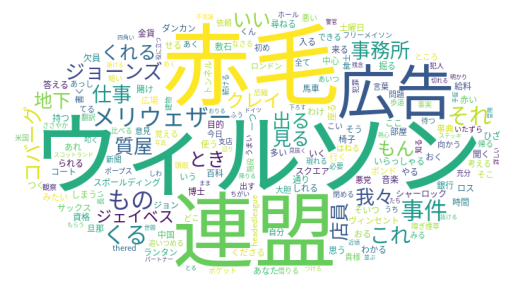

In [32]:
stopwords = ["ワトソン", "ベーカー街","する","いる","ある","こと","ホームズ","わし","なる","言う","よう","れる","やつ","ない","さん"]  # ストップワード（Word Cloudに含めない単語）
words = wc_data.loc[0].to_dict()     # 0番目のデータ（ここでは「赤毛連盟」）の WordCloud を作成
for sw in stopwords:
  words.pop(sw, None)
img = wordcloud.fit_words(words)
plt.imshow(img)
plt.axis("off")

# 6. 分析

分析として，テキスト間の距離や類似度などを計算することも多いですが，ここでは主成分分析（PCA:Principal Component Analysis）を利用して，テキストデータ間の距離を可視化してみます。これによりテキスト間の距離が直感的に把握できます。

### 6-1. 日本語をプロットできるようにするパッケージのインストール

In [33]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=bdda7bd43817c4429c3972c1a7704b0d981e7f21a003060cf227f2f5366a56fc
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


### 6-2. 主成分分析の実行

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9, whiten = False)
pca.fit(bow.toarray())
x = pca.transform(bow.toarray())

主成分の数を確認します。

In [35]:
pca.n_components_

5

### 6-3. 寄与率の確認

寄与率は，各主成分がデータ表現にどれぐらい寄与しているかを示します。簡単にいうと主成分の重要度と言っても良いです。第1主成分が最も重要で，第2，第3と続きます。

In [36]:
pca.explained_variance_ratio_

array([0.44698141, 0.18477726, 0.13526111, 0.13225385, 0.10072636])

### 6-4. 主成分空間でのテキストのプロット

この部分の説明については補足資料を参照して下さい。

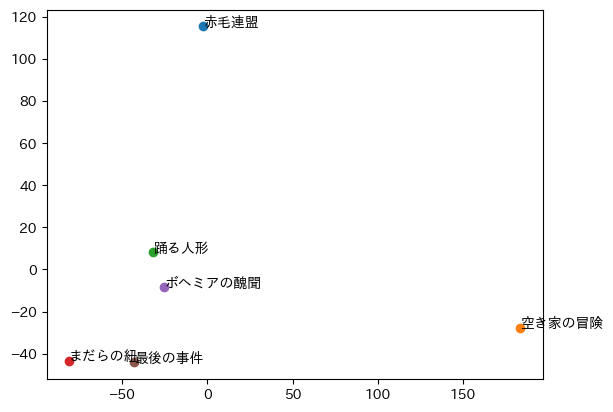

In [37]:
import matplotlib.pyplot as plt
import japanize_matplotlib

name = ["赤毛連盟", "空き家の冒険", "踊る人形", "まだらの紐", "ボヘミアの醜聞", "最後の事件"]
for i in range(len(name)):
  plt.scatter(x[i, 0], x[i, 1], label=name[i])
  plt.text(x[i, 0], x[i, 1], name[i])